##TRABAJO PRÁCTICO N°2
Integrantes: \
-Enzo Ferrari \
-Abril Rodriguez \
-Micaela Pozzo

#Ejercicio 2


##Preparación del entorno.


In [1]:
import os

# Nombre del repositorio y URL para clonar
REPO_NAME = "AA2_tp2"
REPO_URL = "https://github.com/abrilr1604/AA2_tp2.git"

# Verificar si ya estamos en el directorio del repositorio
if REPO_NAME not in os.getcwd():
    # Verificar si el repositorio ya existe localmente
    if not os.path.exists(REPO_NAME):
        try:
            # Intentar clonar el repositorio
            !git clone {REPO_URL}
        except Exception as e:
            print(f"No se pudo clonar el repositorio: {e}")

    # Cambiar al directorio del repositorio si se clonó correctamente
    if os.path.exists(REPO_NAME):
        os.chdir(REPO_NAME)
        print(f"Cambiado al directorio del repositorio {REPO_NAME}")
    else:
        print(f"No se encontró el directorio del repositorio {REPO_NAME}")
else:
    print(f"Ya estás en el directorio del repositorio {REPO_NAME}")


Cloning into 'AA2_tp2'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 691.70 KiB | 2.17 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Cambiado al directorio del repositorio AA2_tp2


In [2]:
import os
print(os.getcwd())


/content/AA2_tp2


Establecer GPU por defecto.

In [3]:
import tensorflow as tf
import numpy as np
import os
import time

In [4]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

1 Physical GPUs, 1 Logical GPUs


##Análisis exploratorio de datos

In [5]:
import tensorflow_datasets as tfds

# Cargar el conjunto de datos
ds, info = tfds.load('ag_news_subset', with_info=True, as_supervised=True)
train_ds, test_ds = ds['train'], ds['test']

# Verificar la cantidad de ejemplos en el dataset de entrenamiento y prueba
num_train_examples = info.splits['train'].num_examples
num_test_examples = info.splits['test'].num_examples

print(f"Número de ejemplos en el conjunto de entrenamiento: {num_train_examples}")
print(f"Número de ejemplos en el conjunto de prueba: {num_test_examples}")

# Ver algunos ejemplos del dataset
for example, label in train_ds.take(5):
    print(f"Texto: {example.numpy()}")
    print(f"Etiqueta: {label.numpy()}")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/120000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news_subset/incomplete.YMM8BV_1.0.0/ag_news_subset-train.tfrecord*...: …

Generating test examples...:   0%|          | 0/7600 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news_subset/incomplete.YMM8BV_1.0.0/ag_news_subset-test.tfrecord*...:  …

Dataset ag_news_subset downloaded and prepared to /root/tensorflow_datasets/ag_news_subset/1.0.0. Subsequent calls will reuse this data.
Número de ejemplos en el conjunto de entrenamiento: 120000
Número de ejemplos en el conjunto de prueba: 7600
Texto: b'AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.'
Etiqueta: 3
Texto: b'Reuters - Major League Baseball\\Monday announced a decision on the appeal filed by Chicago Cubs\\pitcher Kerry Wood regarding a suspension stemming from an\\incident earlier this season.'
Etiqueta: 1
Texto: b'President Bush #39;s  quot;revenue-neutral quot; tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners #39; sights, news reports say.'
Etiqueta: 2
Texto: b'Britain will run out of leading scientists unless science education is improved, says Professor Colin Pi

Estadísticas de la longitud de textos en el entrenamiento

In [6]:
# Calcular la longitud de los textos en el conjunto de entrenamiento
train_text_lengths = []
for text, _ in train_ds:
    train_text_lengths.append(len(text.numpy().split()))

# Calcular estadísticas de longitud
import numpy as np
train_text_lengths = np.array(train_text_lengths)
print(f"Longitud media del texto en el conjunto de entrenamiento: {np.mean(train_text_lengths)}")
print(f"Longitud máxima del texto en el conjunto de entrenamiento: {np.max(train_text_lengths)}")
print(f"Longitud mínima del texto en el conjunto de entrenamiento: {np.min(train_text_lengths)}")


Longitud media del texto en el conjunto de entrenamiento: 31.062691666666666
Longitud máxima del texto en el conjunto de entrenamiento: 173
Longitud mínima del texto en el conjunto de entrenamiento: 3


Análisis de la distribución de etiquetas

In [7]:
import collections

# Contar las etiquetas en el conjunto de entrenamiento
train_labels = []
for _, label in train_ds:
    train_labels.append(label.numpy())

label_counts = collections.Counter(train_labels)
print(f"Distribución de etiquetas en el conjunto de entrenamiento: {label_counts}")

# Contar las etiquetas en el conjunto de prueba
test_labels = []
for _, label in test_ds:
    test_labels.append(label.numpy())

label_counts_test = collections.Counter(test_labels)
print(f"Distribución de etiquetas en el conjunto de prueba: {label_counts_test}")

Distribución de etiquetas en el conjunto de entrenamiento: Counter({3: 30000, 1: 30000, 2: 30000, 0: 30000})
Distribución de etiquetas en el conjunto de prueba: Counter({1: 1900, 0: 1900, 3: 1900, 2: 1900})


Visualización de datos

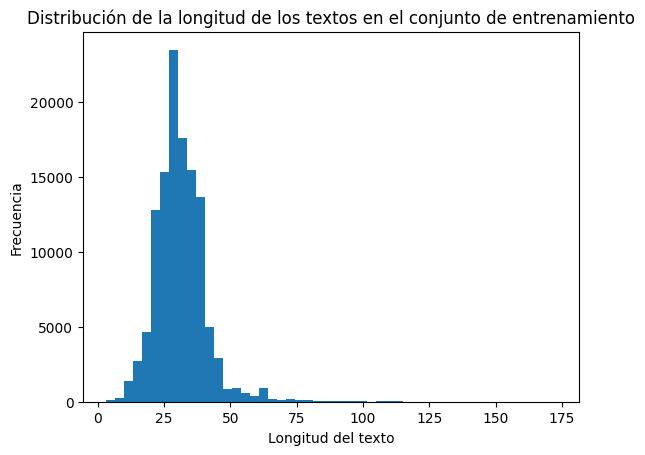

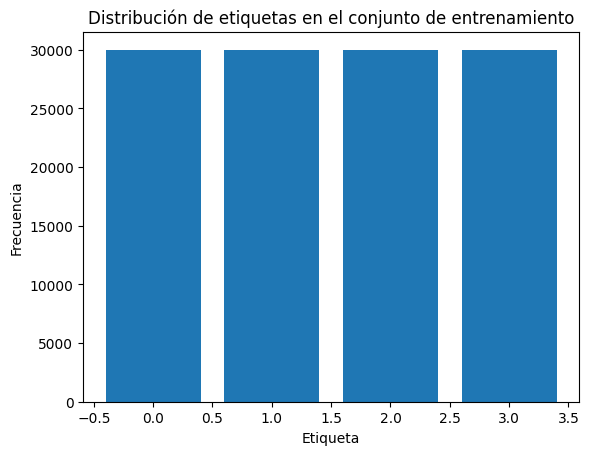

In [8]:
import matplotlib.pyplot as plt

# Histograma de la longitud de los textos
plt.hist(train_text_lengths, bins=50)
plt.title('Distribución de la longitud de los textos en el conjunto de entrenamiento')
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para la distribución de etiquetas
labels, counts = zip(*label_counts.items())
plt.bar(labels, counts)
plt.title('Distribución de etiquetas en el conjunto de entrenamiento')
plt.xlabel('Etiqueta')
plt.ylabel('Frecuencia')
plt.show()

El histograma de la longitud de los textos representa una distribución normal de los datos. Y el gráfico de barras donde todas las barras tienen alturas iguales indica que el conjunto de datos está balanceado en cuanto a las etiquetas.

Análisis de la distribución de palabras

In [9]:
from collections import Counter
import re

# Contar la frecuencia de palabras en el conjunto de entrenamiento
word_counts = Counter()
for text, _ in train_ds:
    words = re.findall(r'\b\w+\b', text.numpy().decode('utf-8').lower())
    word_counts.update(words)

# Mostrar las 20 palabras más comunes
common_words = word_counts.most_common(20)
print("20 palabras más comunes:", common_words)


20 palabras más comunes: [('the', 199037), ('a', 108276), ('to', 96826), ('of', 89573), ('in', 78754), ('and', 66621), ('s', 49667), ('on', 48070), ('for', 38224), ('39', 31874), ('that', 27788), ('with', 22722), ('as', 21926), ('its', 21267), ('at', 20834), ('said', 20098), ('is', 19994), ('it', 19171), ('by', 18770), ('has', 18302)]


Análisis de secuencias de dos y tres palabras

In [10]:
from nltk import ngrams

# Contar la frecuencia de bigramas en el conjunto de entrenamiento
bigram_counts = Counter()
for text, _ in train_ds:
    words = re.findall(r'\b\w+\b', text.numpy().decode('utf-8').lower())
    bigrams = ngrams(words, 2)
    bigram_counts.update(bigrams)

# Mostrar los 20 bigramas más comunes
common_bigrams = bigram_counts.most_common(20)
print("20 bigramas más comunes:", common_bigrams)


20 bigramas más comunes: [(('39', 's'), 25061), (('in', 'the'), 20984), (('of', 'the'), 20015), (('for', 'the'), 8559), (('in', 'a'), 7583), (('to', 'the'), 7271), (('on', 'the'), 6901), (('new', 'york'), 6071), (('at', 'the'), 5669), (('of', 'a'), 5615), (('u', 's'), 5598), (('to', 'a'), 4955), (('the', 'first'), 4379), (('lt', 'a'), 4234), (('the', 'world'), 4222), (('on', 'wednesday'), 4017), (('on', 'tuesday'), 4017), (('and', 'the'), 3961), (('a', 'new'), 3953), (('with', 'the'), 3941)]


Nuevo dataset

In [11]:
import tensorflow_datasets as tfds

# Dictionary to collect articles by class
articles_by_class = {}

# Collect and separate articles by class
for example in tfds.as_numpy(train_ds):
    description, label = example
    text = description.decode("utf-8")
    if label not in articles_by_class:
        articles_by_class[label] = []
    articles_by_class[label].append(text)

In [12]:
# Chequear resultados
for label, articles in articles_by_class.items():
    print(f"Class {label}: {len(articles)} articles")

Class 3: 30000 articles
Class 1: 30000 articles
Class 2: 30000 articles
Class 0: 30000 articles


Reducimos el dataset

In [13]:
import random
# Reduction factor
reduction_factor = 12

# Function to reduce the number of articles by a factor
def reduce_dataset_by_factor(articles_by_class, factor):
    reduced_articles_by_class = {}
    for label, articles in articles_by_class.items():
        sample_size = len(articles) // factor
        reduced_articles = random.sample(articles, sample_size)
        reduced_articles_by_class[label] = reduced_articles
    return reduced_articles_by_class

# Reduce dataset
reduced_articles_by_class = reduce_dataset_by_factor(articles_by_class, reduction_factor)



In [14]:

# Chequear resultados
for label, articles in reduced_articles_by_class.items():
    print(f"Class {label}: {len(articles)} articles")

Class 3: 2500 articles
Class 1: 2500 articles
Class 2: 2500 articles
Class 0: 2500 articles


Eliminamos las stopwords de nuestro dataset

In [15]:
!pip install nltk
!pip install nltk wordcloud matplotlib

In [16]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descarga las stopwords del español
nltk.download('stopwords')

# Lista de stopwords en español
stop_words = set(stopwords.words('spanish'))

def remove_stopwords(text):
    # Eliminar puntuación
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Tokenizar el texto
    words = text.split()

    # Filtrar las stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Unir las palabras filtradas
    return ' '.join(filtered_words)


# Aplicar la eliminación de stopwords a todo el diccionario
for key, articles in reduced_articles_by_class.items():
    reduced_articles_by_class[key] = [remove_stopwords(article) for article in articles]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Veamos las nubes de palabras de cada clase

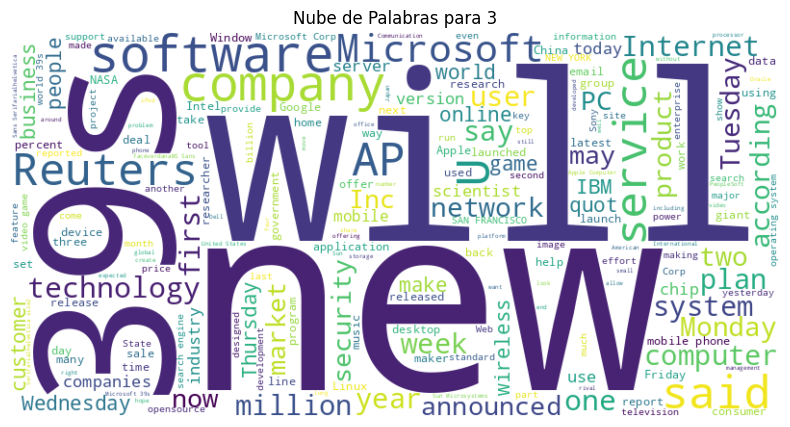

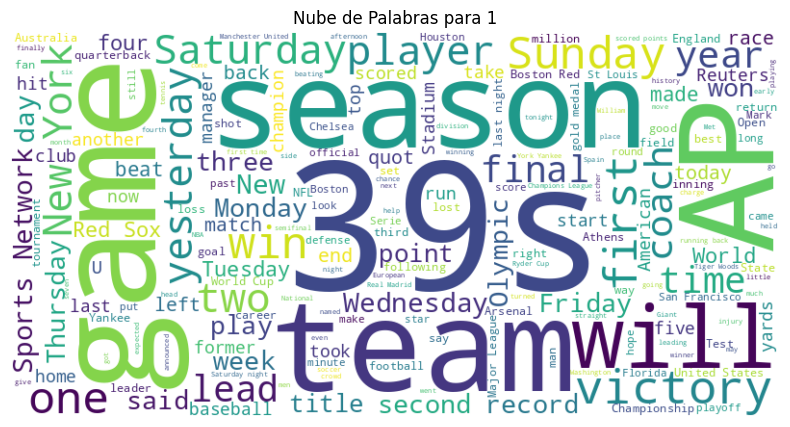

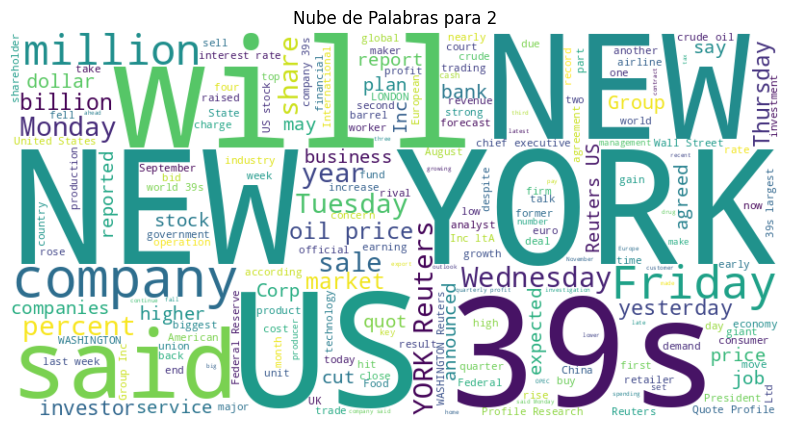

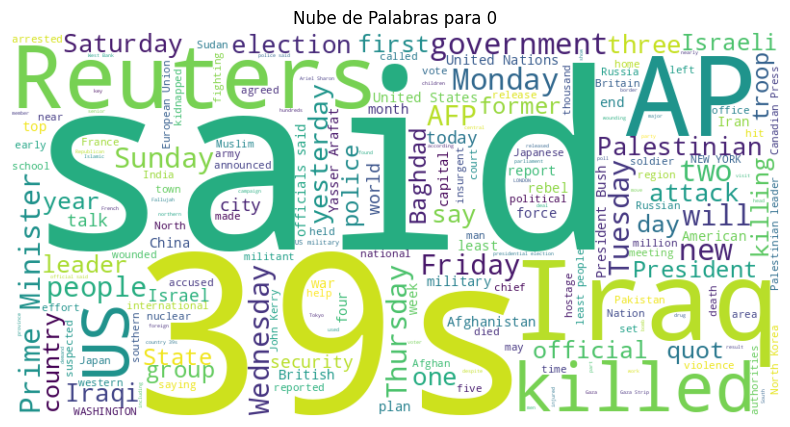

In [18]:
# Crear una nube de palabras para cada clase
for key, articles in reduced_articles_by_class.items():
    all_text = ' '.join(articles)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras para {key}')
    plt.show()

Veamos la nube de palabras del dataset final

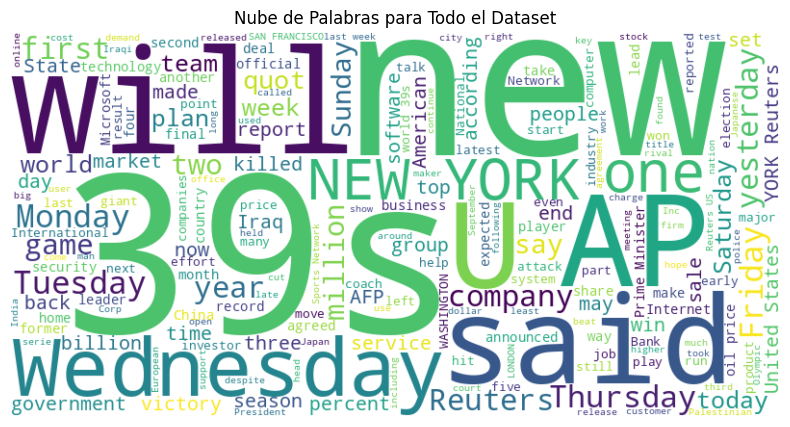

In [19]:
# Combinar todos los artículos en un solo texto
all_articles = []
for articles in reduced_articles_by_class.values():
    all_articles.extend(articles)

combined_text = ' '.join(all_articles)

# Eliminar las stopwords del texto combinado
processed_text = remove_stopwords(combined_text)

# Crear y mostrar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Todo el Dataset')
plt.show()

Análisis de la distribución de etiquetas

Distribución de artículos en el diccionario: {3: 2500, 1: 2500, 2: 2500, 0: 2500}


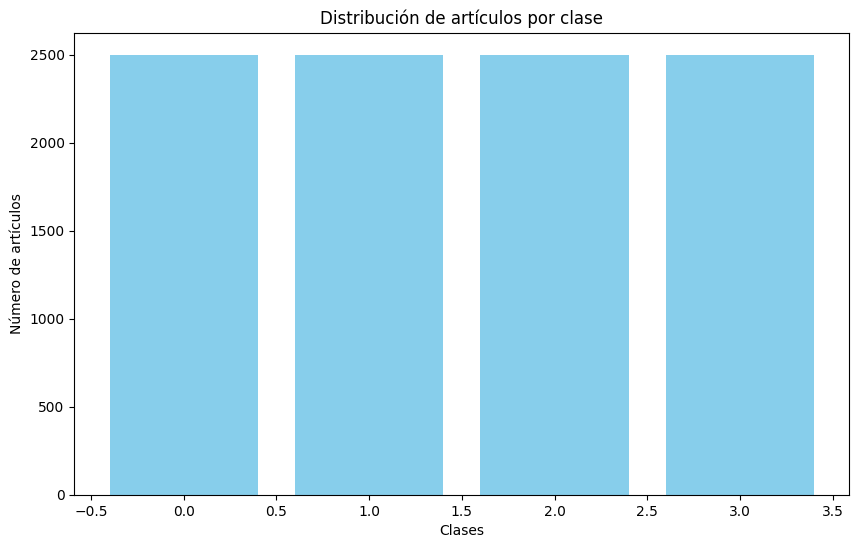

In [20]:
import collections
import matplotlib.pyplot as plt

# Contar las etiquetas en el diccionario
class_counts = {key: len(articles) for key, articles in reduced_articles_by_class.items()}

# Imprimir el número de artículos en cada clase
print(f"Distribución de artículos en el diccionario: {class_counts}")

# Visualizar la distribución de los artículos en las clases
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Clases')
plt.ylabel('Número de artículos')
plt.title('Distribución de artículos por clase')
plt.show()

El dataset quedó con las clases perfectamente balanceadas